## Image Techniques

#### Image Classification:
- Predicts class of one object in the image.

#### Object Localization:
- Identifies the location of the one or more object of the class and drawing bounding box around their extent in the image.

#### Object Detection:
- Combines image classification and object localization.
- localizes and classifies one or more objects in the image.

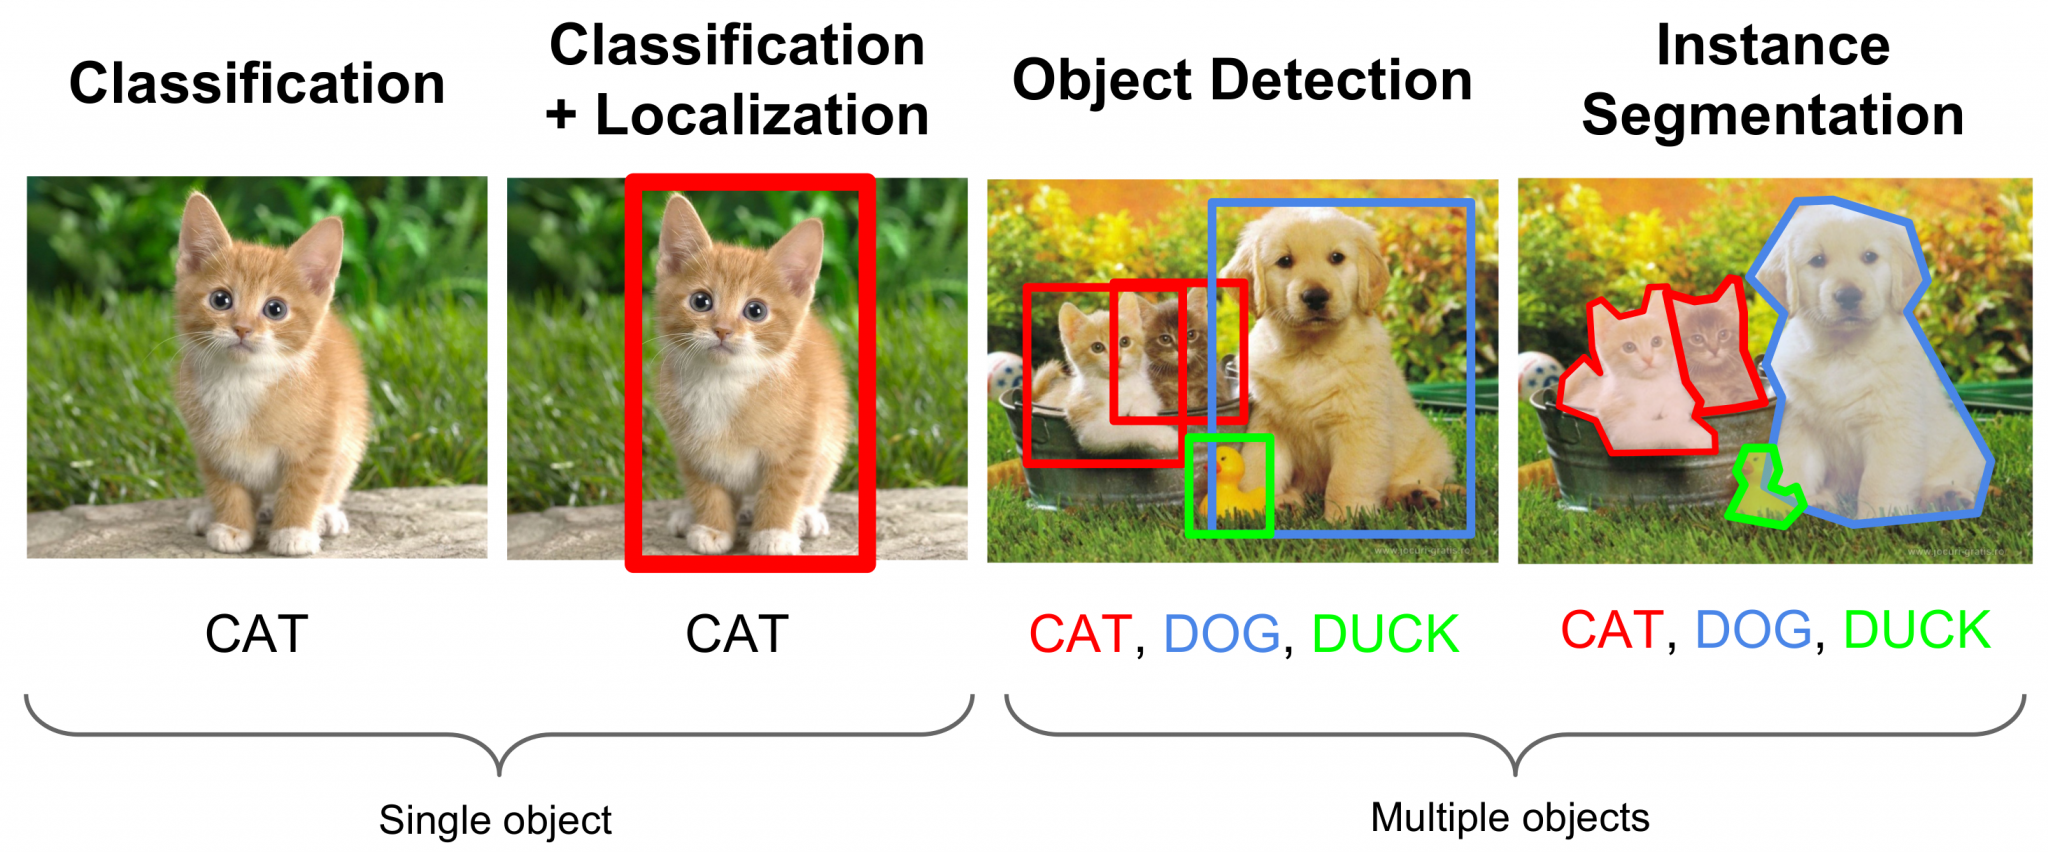

## Object Localization Representation:
- need atleast 4 points to draw bounding around the object.
- **2 common ways of representing the coordinates of the bounding box**
  - (x1, x2) represents upper left corner points & (x2, y2) represents bottom right corner points.
  - (x, y) represents corner points & (w, h) represents width and height of the bounding box.

## Why CNN?

When we deal with image of high resolution, look at below 

- Input image of shape = (1000,1000,3), so total number of pixels are 3 million.
- We have to classify the image into one of the 2 categories.
- Let's design a Linear NN for this,
  - model = Linear(3M, 1000) -> Acitvation -> Linear(1000, 2)
  - weight matrix W1 = (1000, 3M) i.e., number of parameters are 3 billion

#### **Difficulties:**
- Neural network will overfit with these many parameters
- Computation & memory requirements to train these many parameters will be bit infeasible.

#### **Solution:**
- we need convolution operation, which is one of the fundamental building blocks of convolution neural network. 


## Convolutional Operation

**Edge Detection** is example of convolution operation. Let's explore this with example.

**What is Edge Detection?**

- image processing technique to find boundaries of an object within the image
- locates area with strong intensity contrasts

#### Vertical Edge Detection:
 
 Let's create a dummy image array with white background on the left half and black background on the right half of the image. And, we use Prewitt filter to detect edge in the image.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_height = 300
img_width = 300

In [ ]:
img = np.zeros((img_height,img_width),dtype=int)
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
img[:,:img_width//2] = 1

In [ ]:
img

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

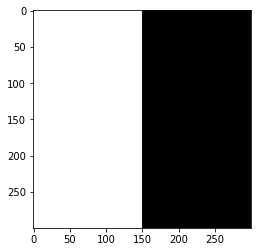

In [ ]:
plt.imshow(img,cmap=plt.cm.gray)

**Convolution operation:**

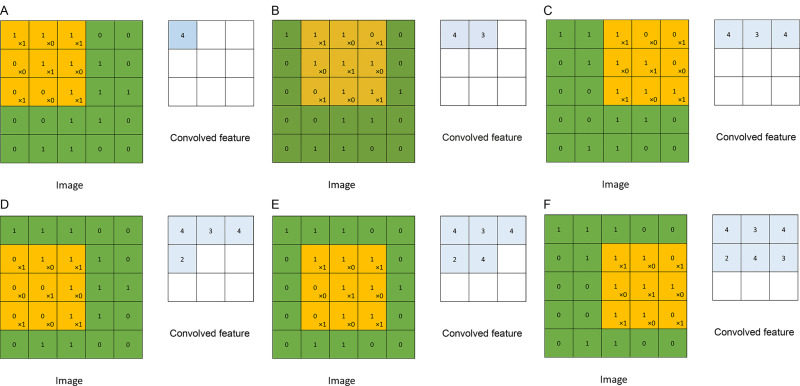

In the output section A, 4 is obtained by below convoltion operation:

$ = (1*1) + (1*0) + (1*1) + (0*0) + (1*1) + (1*0) + (0*1) + (0*0) + (1*1)$

$ = 4 $


Kernel/filter used in the example:

$\begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 1 \end{bmatrix}$

**Prewitt Filter:** (Filter is also called as Kernel)


$\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$

In [ ]:
filter = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
],dtype=int)

In [ ]:
filter

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

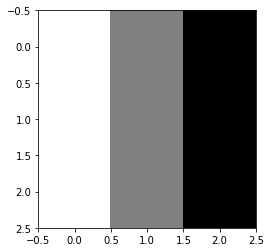

In [ ]:
plt.imshow(filter,cmap=plt.cm.gray)

In [ ]:
output = np.zeros((img_height-2,img_width-2),dtype=int)
for i in range(0,img_height-2):
  for j in range(0,img_width-2):
    output[i,j]= (filter*img[i:i+3,j:j+3]).sum()

In [ ]:
output

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

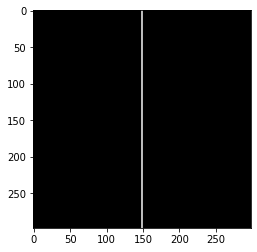

In [ ]:
plt.imshow(output,cmap=plt.cm.gray)

We can see the vertical white line indicating the vertical edge detected between white and black background (intensity contrasts).

#### Horizontal Edge Detection:

In [ ]:
img_height = 300
img_width = 300

In [ ]:
img = np.zeros((img_height,img_width),dtype=int)
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
img[:img_width//2,:] = 1

In [ ]:
img

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

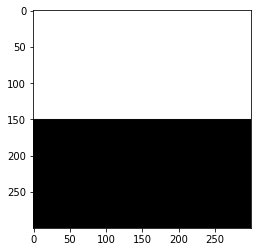

In [ ]:
plt.imshow(img,cmap=plt.cm.gray)

In [ ]:
filter = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

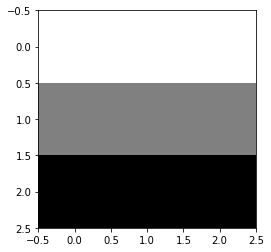

In [ ]:
plt.imshow(filter,cmap=plt.cm.gray)

In [ ]:
output = np.zeros((img_height-2,img_width-2),dtype=int)
for i in range(0,img_height-2):
  for j in range(0,img_width-2):
    output[i,j]= (filter*img[i:i+3,j:j+3]).sum()

In [ ]:
output

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

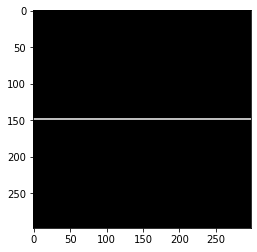

In [ ]:
plt.imshow(output,cmap=plt.cm.gray)

We can see the horizontal white line indicating the horizontal edge detected between white and black background (intensity contrasts).


**Some of the other filters are**

1. *Sobel filter*

$\begin{bmatrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}$

2. *Scharr filter*

$\begin{bmatrix} 3 & 0 & -3 \\ 10 & 0 & -10 \\ 3 & 0 & -3
 \end{bmatrix}$

#### Example of Edge Detection:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image
import requests
from io import BytesIO

url = "https://track2traininginstitute.files.wordpress.com/2021/07/apj.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [ ]:
img_arr = np.array(img)

In [ ]:
img_height,img_width,_ = img_arr.shape

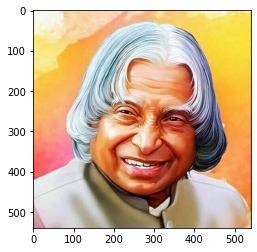

In [ ]:
plt.imshow(img_arr,cmap=plt.cm.gray)

In [ ]:
img = img.convert('L')

In [ ]:
img_arr = np.array(img)

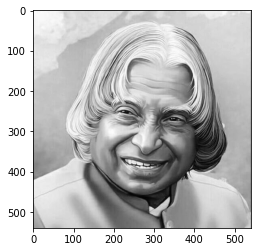

In [ ]:
plt.imshow(img_arr,cmap=plt.cm.gray)

In [ ]:
img_arr.shape

(540, 540)

In [ ]:
img_height,img_width = img_arr.shape

In [ ]:
filter = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

In [ ]:
filter

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

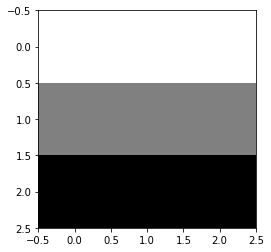

In [ ]:
plt.imshow(filter,cmap=plt.cm.gray)

In [ ]:
output = np.zeros((img_height-2,img_width-2),dtype=int)
for i in range(0,img_height-2):
  for j in range(0,img_width-2):
    output[i,j]= (filter*img_arr[i:i+3,j:j+3]).sum()

In [ ]:
output

array([[  1,   1,   1, ..., -33, -43, -41],
       [  2,   1,   0, ..., -16, -20, -19],
       [  2,   1,   0, ...,   2,   9,  12],
       ...,
       [  4,   5,   5, ...,   1,   4,   4],
       [  5,   5,   5, ...,   5,  12,  12],
       [  6,   6,   6, ...,   7,   9,   9]])

In [ ]:
output.shape

(538, 538)

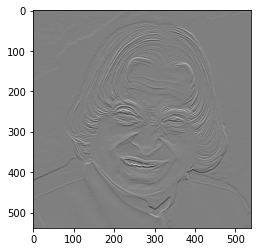

In [ ]:
plt.imshow(output,cmap=plt.cm.gray)

### Padding:

- input image (h, w) = (6 * 6)

- filter size (f1, f2) = (3 * 3)

- convolved image (h1, w1) = (4 * 4)

**Formula:**

$h1 = h - f1 + 1 $

$w1 = w - f2 + 1 $

- pixels at the corners are used less in output when compared to other pixes used in the computation/learning, which means we are shrinking the output and throwing away lot of information from edges.

**Solution:**

- we can pad the border of the image with zeros, for example, with 1 additional border, (6 * 6) image will become (8 * 8) image, so that output image after convolution will be (6 * 6)

**After padding:**

p = padding size

$h1 = h + 2p - f1 + 1 $

$w1 = w + 2p - f2 + 1 $

**Same Convolution:**

To get same shape after the convolution, 

$ p = ({f-1})/2$

*Proof:*

$h + 2p -f + 1 = h$

$p = (f-1)/2$

- f is usually odd for symmetric padding.

#### Plotting exmaple with padding

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
img = np.ones((10,10),dtype=int)
img

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

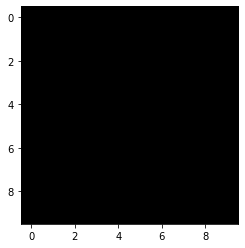

In [25]:
plt.imshow(img,cmap=plt.cm.gray) # it should be white, but it is fully plotted as black

In [26]:
padded_img = np.zeros((12,12),dtype=int)
padded_img[1:-1,1:-1]=img

In [27]:
padded_img

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

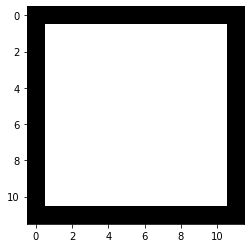

In [28]:
plt.imshow(padded_img,cmap=plt.cm.gray)

### Striding:

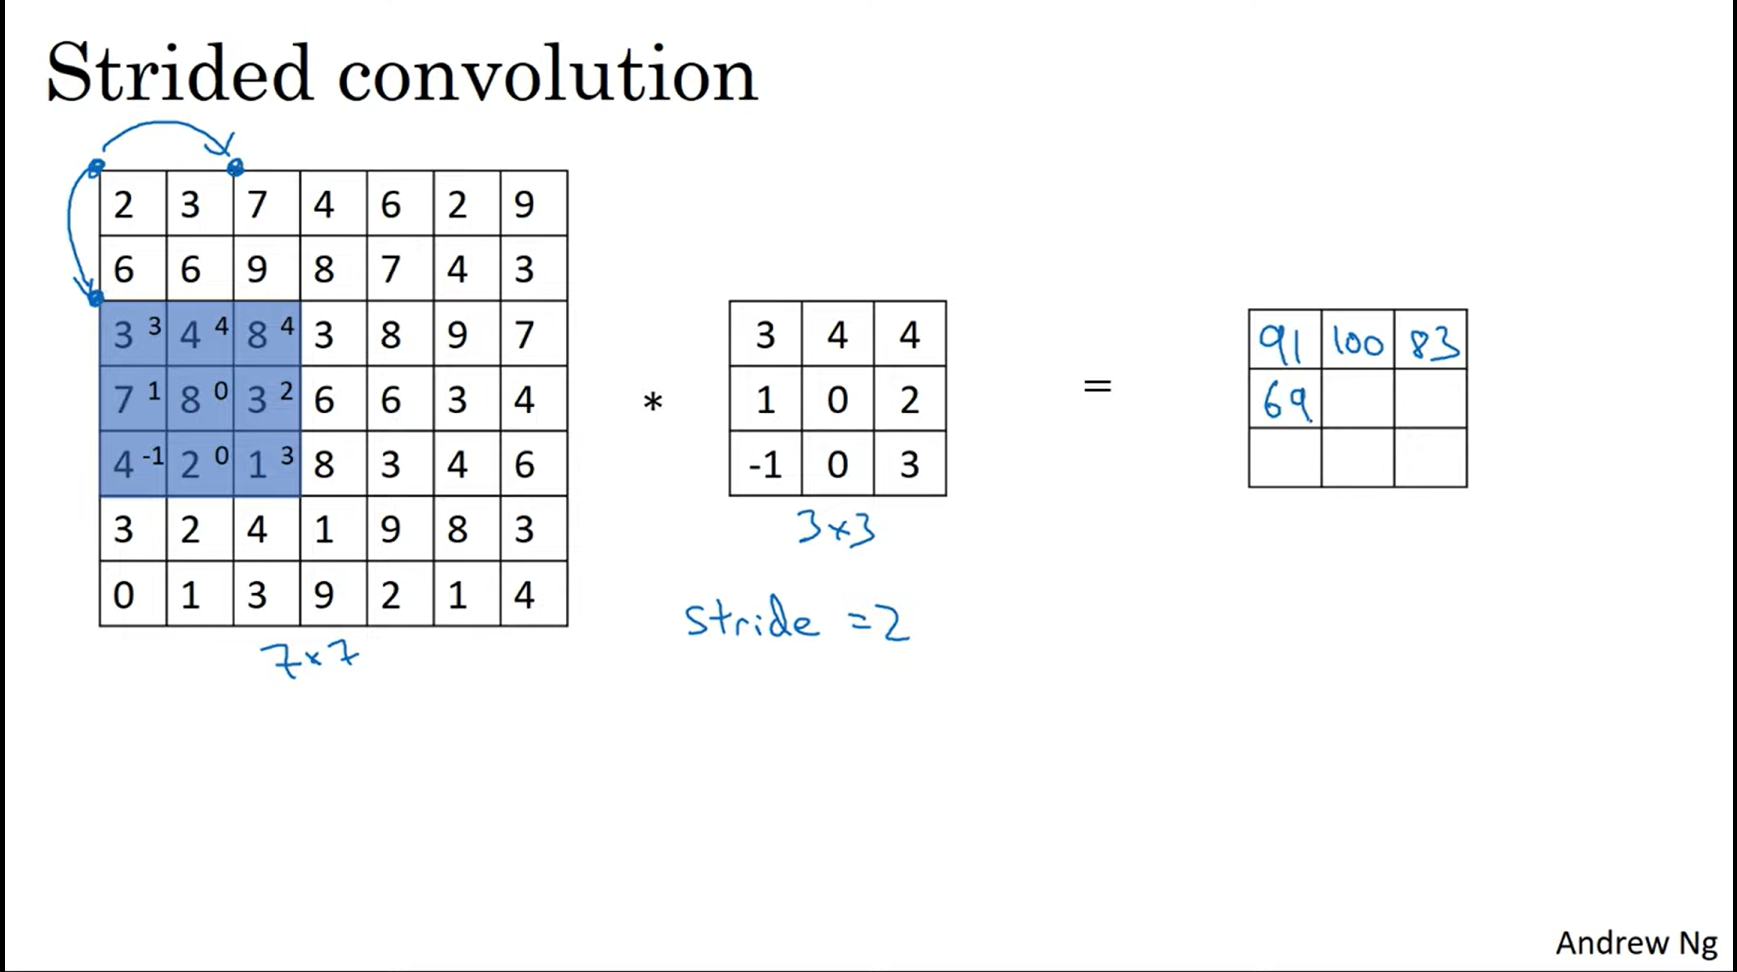

S - stride value

$h1 = (h + 2p - f1)/s + 1 $

$w1 = (w + 2p - f2)/s + 1 $

### Convolution over volume:

- Image with channels & filter with channels.

**Sample Example:**

**Without channels:**
- Input image = (6 * 6)
- Filter = (3 * 3)
- Convolved image = (4 *4)

**With channels:**
- Input image = (6 * 6 * 3)
- Filter = (3 * 3 * 3) [i.e., we have filter for each channel]
- Convolved image = (4 * 4)

**In general notation:**

- Input image = $(h, w, ch)$
- Filter = $(f, f, ch)$
- Convolved image = ( $((h+2p-f)/s + 1)$ , $((w+2p-f)/s + 1)$)

Let's assume we have RGB channels (3 channels), to detect vertical edges in R channel

R = $\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$
G = $\begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}$
B = $\begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}$

To detect vertical edges in any channel,

R = $\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$
G = $\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$
B = $\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$

### Multiple Filters:

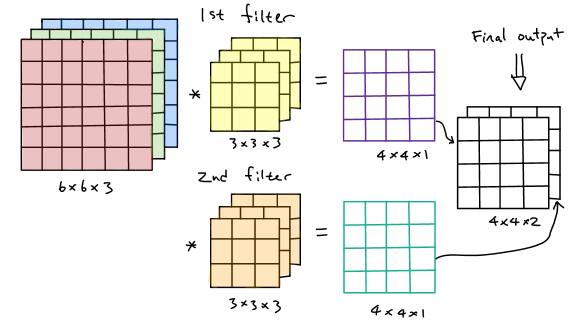

**Sample Example:**

**With multiple filters:**
- Input image = (6 * 6 * 3)
- Filter = (3 * 3 * 3 * 2)
- Convolved image = (4 * 4 * 2)

**General notation:**
- Input image = $(h, w, ch)$
- Filter = $(f, f, ch, num_filters)$
- Convolved image = $((h+2p-f)/s+1 , (w+2p-f)/s+1 , num\_filters)$


In the above image referred, first filter (3 * 3 * 3) could be vertical edge detection filter
$\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$ 

and second filter (3 * 3 * 3) could be horizontal edge detection filter $\begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{bmatrix}$. 

***Convoltional Neural Network:***

- **To detect, complex edges in the computer vision, we can't hand pick the (3 * 3) filter, instead we learn those (3 * 3) filters through backpropagation.**

**Types of layers in CNN:**

- Max pooling
  - No parameters to learn
  - Hyperparameters are padding and stride.

- Convolution layer
  - Filters are learnable parameters
  - Merits:
    - Parameter sharing: a feature detector (i.e., vertical edge detector) filter used in one of part of the image is probably useful in another part of the image
    - Sparsity of connections: In each layer, each output value depends on only on a small number of inputs.
    - Sparsity example:
     Image = (6, 6) and filter = (3, 3), in the convolved image (4, 4), one value depends on the 9 pixels of the image only

- Fully connected layer
  - Flatten the previous layer output and turns them into a single vector that can be input for the next layer.